In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sys
import warnings
plt.style.use("seaborn-talk")
%matplotlib notebook
warnings.filterwarnings("ignore")

In [38]:
import pandas as pd
df = pd.read_csv("voice.csv",encoding='latin-1')
df.head()
col = df.columns

In [39]:
print("Shape of data",df.shape)
print("Total number of labels : {}".format(df.shape[0]))
print("Total no. of feature : {}".format(df.shape[1]-1))
print("Number of male : {}".format(df[df.label=='male'].shape[0]))
print("Number of female : {}".format(df[df.label=='female'].shape[0]))

Shape of data (3168, 21)
Total number of labels : 3168
Total no. of feature : 20
Number of male : 1584
Number of female : 1584


In [40]:
X = df.iloc[ :, :-1]
print(X.shape)
Y = df.iloc[:,-1]
#print(Y)

(3168, 20)


In [41]:
from sklearn.preprocessing import LabelEncoder
Y=LabelEncoder().fit_transform(Y)
print(Y)

[1 1 1 ... 0 0 0]


In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
#StandardScaler().fit(X)
#X=StandardScaler().transform(X)
X=scaler.transform(X)

In [43]:
X=np.insert(X,0,1,axis=1)
Y=LabelEncoder().fit_transform(Y)

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=100)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2217, 21)
(2217,)
(951, 21)
(951,)


In [45]:
print(x_train)

[[ 1.          0.72668226 -0.23876781 ...  0.29058556  0.29897719
  -1.2100637 ]
 [ 1.          1.60163393  0.53956135 ... -0.84780323 -0.83533342
  -0.03278984]
 [ 1.          0.00922468 -1.6197925  ... -1.1740082  -1.20381788
  -0.66559125]
 ...
 [ 1.         -0.27505589 -0.3130515  ...  0.44370218  0.456582
  -0.84497233]
 [ 1.          1.7515588  -1.52141548 ...  1.76849381  1.71742041
  -0.40111241]
 [ 1.         -0.62147086  0.33262044 ... -1.13961244 -1.12640285
   1.88033187]]


In [46]:
print(y_train)

[1 0 0 ... 0 0 1]


In [47]:
#arr=np.ones(len(x_train))
COL = list(col)
#COL.insert(0,'bias')
#COL
COL.pop()

df_x_test=pd.DataFrame(x_test,columns=["bias"] + COL )
#df_x_test
#df_x_train
df_y_test=pd.DataFrame(y_test,columns=['label'])
df_y_test

df_new=df_x_test
df_new['label']=df_y_test
#df_new
#print(df_x_train.shape)
#print(df_y_train.shape)


In [48]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def hypothesis(x,w):
    return np.dot(x,w)
def gradient_decent(x,y,y_cap,alpha=0.2):
    return alpha*(x.T@(y_cap-y).T)/len(y)
def calculate_weight(x,y,weight):
    #for z in np.arange(1,0.00001,-0.0001):
    for z in range(1,10000):
        h=hypothesis(x,weight)
        y_cap=sigmoid(h)
        weight=weight-gradient_decent(x,y,y_cap,alpha=0.2)
    return weight

In [49]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def hypothesis(x,w):
    return np.dot(x,w)
def gradient_decent(x,y,y_cap,alpha=0.2):
    return alpha*(x.T@(y_cap-y).T)/len(y)
def calculate_weight(x,y,weight):
    for z in range(1,10000):
        h=hypothesis(x,weight)
        y_cap=sigmoid(h)
        weight=weight-gradient_decent(x,y,y_cap,alpha=0.2)
    return weight

In [50]:
theta=np.zeros(len(X[0]))
weights=calculate_weight(x_train,y_train,theta)
print("Weights", weights)

Weights [-0.91363341  0.07420433  0.01102363 -0.24636801 -1.14037897  0.63571442
  1.64881062 -0.38359811 -0.08079386  1.5692435  -1.89822304  0.13514787
  0.07420433 -5.32776214  0.50124548  0.01876684  0.10218584 -0.07680982
  0.02053217  0.02191993 -0.33610314]


In [51]:
def predict(p,weights):
    #p=np.insert(p,0,1,axis=1)
    U=hypothesis(p,weights)
    y_cap=sigmoid(U)
    return y_cap

In [52]:
pp=predict(x_test,weights)
print(pp.shape)

(951,)


In [53]:
count=0
for i in range(y_test.size):
    if pp[i]>0.5:
        pp[i]=1
        if pp[i]==y_test[i]:
            count+=1
    else:
        pp[i]=0
        if pp[i]==y_test[i]:
            count+=1
print("Number of labels : " ,y_test.size)
print("Number of labels with correct predictions :", count)

Number of labels :  951
Number of labels with correct predictions : 920


In [54]:
print("Accuracy=", (count/(y_test.size))*100)

Accuracy= 96.74027339642481


<IPython.core.display.Javascript object>


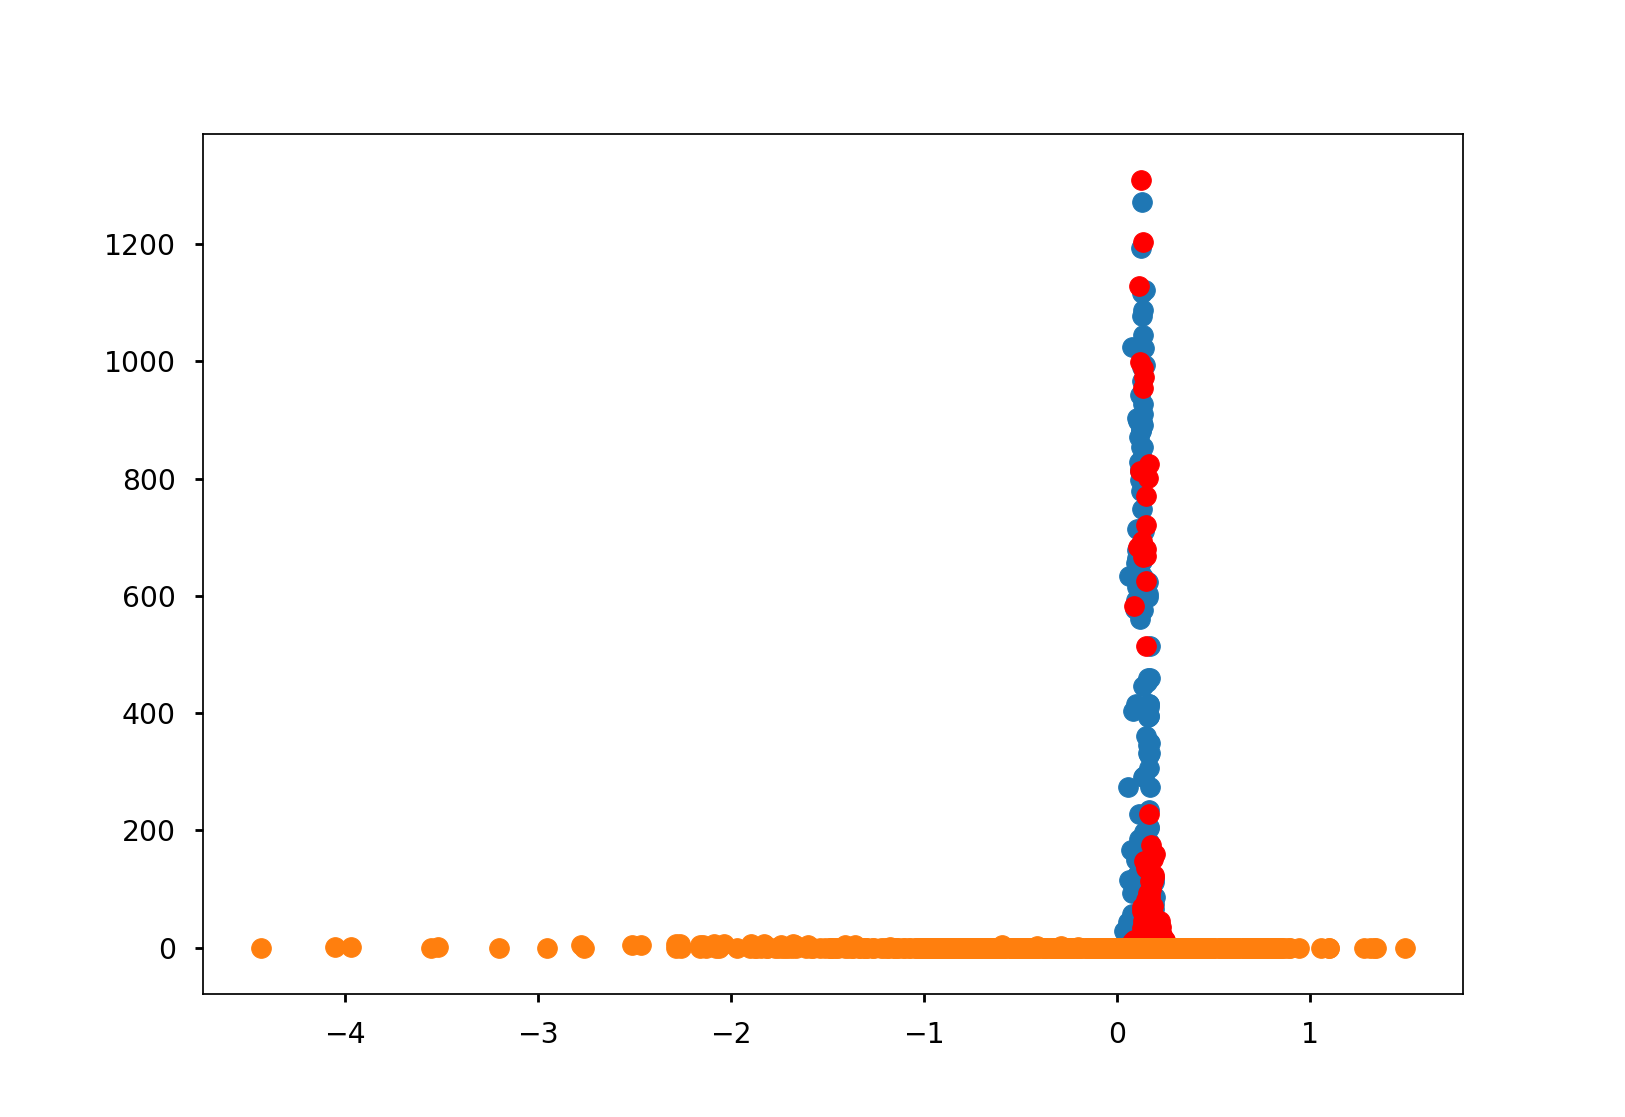

In [55]:
import matplotlib.pyplot as plt
df1=df[['meanfreq']]
df2=df[['kurt']]
df3=df[['label']]
a=df[df.label=='male']
b=df[df.label=='female']

d = a['meanfreq']
e = a['kurt']
plt.scatter(d, e,)

d = b['meanfreq']
e = b['kurt']
plt.scatter(d, e, c='r')

In [56]:
import matplotlib.pyplot as plt
df1=df_new[['meanfreq']]
df2=df_new[['kurt']]
df3=df_new[['label']]
a=df_new[df_new.label==1]
#print(a)
b=df_new[df_new.label==0]
#print(b)
d = a['meanfreq']
#print(d)
e = a['kurt']
plt.scatter(d, e,)

d = b['meanfreq']
e = b['kurt']
#plt.scatter(d, e, c='r')

In [57]:
pp = np.round(pp)

In [58]:
male = []
female = []
wrong_male = []
wrong_female = []


for f,p,a in zip(x_test,pp,y_test):
    if p:
        if a:
            male.append(f)
        else:
            wrong_male.append(f)
    else:
        if not a:
            female.append(f)
        else:
            wrong_female.append(f)

In [59]:
male = np.array(male)
female = np.array(female)
wrong_male = np.array(wrong_male)
wrong_female = np.array(wrong_female)

<IPython.core.display.Javascript object>


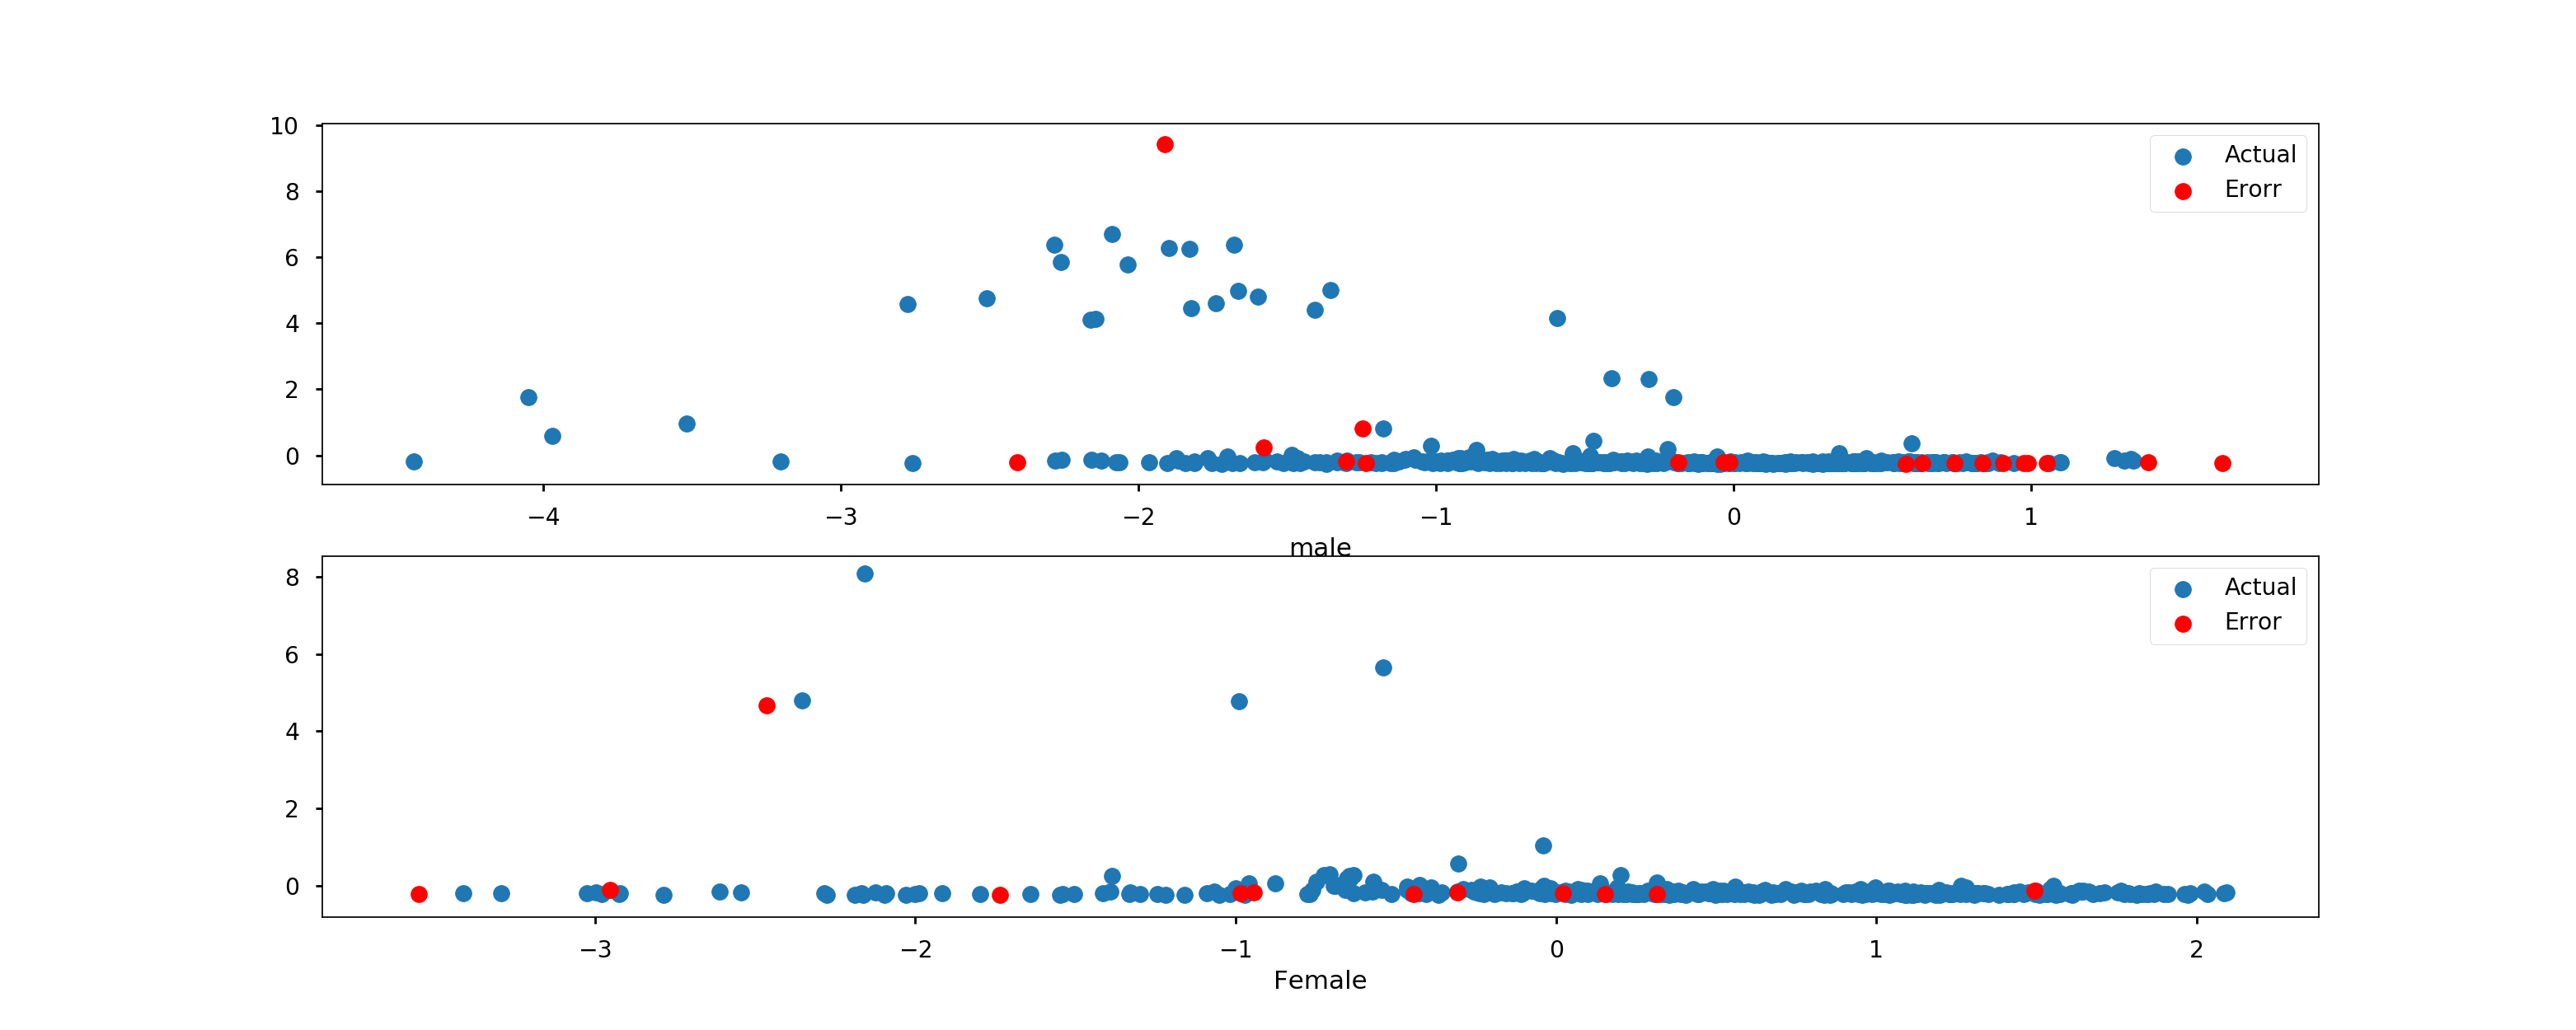

Text(0.5,0,'Female')

In [60]:
fig = plt.figure(figsize=(20,8))
ax = plt.subplot(211)
ax.scatter(male[:,1], male[:,8], label= "Actual")
ax.scatter(wrong_male[:,1], wrong_male[:,8], c = "r", label='Erorr')
ax.legend()
ax.set_xlabel("male")


ax = plt.subplot(212)
ax.scatter(female[:,1], female[:,8], label= "Actual")
ax.scatter(wrong_female[:,1], wrong_female[:,8], c = "r", label='Error')
ax.legend()
ax.set_xlabel("Female")